<a href="https://colab.research.google.com/github/Deare-stack/GenAI/blob/main/hw2_mlp_problem1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Name: Deare
##Assignment: HW2-Problem1
##Title: Part 1: MLP model

In [ ]:
## Part1:
import numpy as np ##Use for numerical operations
import matplotlib.pyplot as plt##For plotting graphs and images
from tensorflow.keras import layers, models, optimizers, utils, datasets##Used for building and training neural network models
#from notebooks.utils import display

In [ ]:
##Step 1. Data Preprocessing:
# Load the dataset
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()## x_train and x_test contain the image data 32x32x3 . y_train and y_test contain the Lables integer 0 to 9.
##datasets.cifar10.load_data() this function returns training data and testing data

# Normalize the data
##Pixel values are converted from a range of 0-255 to 0-1 to make neural network training more stable and faster.
x_train = x_train.astype("float32") / 255.0 ## convert training's data data type from integer to float and dividing every pixel by 255.0
x_test = x_test.astype("float32") / 255.0## convert testing data's data type from integer to float and dividing every pixel by 255.0

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
# One-hot encoding of labels
##this step ensures that the input features and the target labels are in a suitable format
NUM_CLASSES = 10## number of classes
y_train = utils.to_categorical(y_train, NUM_CLASSES)##utils.to_categorical()convert to a matrix
y_test = utils.to_categorical(y_test, NUM_CLASSES)

display(x_train[:10])##x_train[:10] extracts the first ten elements (images) from the x_train array.
print(y_train[:10])##again extracts the first ten elements from the y_train array.

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


In [ ]:
##Step2. MLP Model:
##create_mlp_model() which now includes several Dropout layers to reduce overfitting.
def create_mlp_model():
    input_layer = layers.Input((32, 32, 3))##input_layer: This is the input_shape I defined the input shape of the model which matches the shape of CIFAR-10 images.
    x = layers.Flatten()(input_layer)##Flatten: Converts the 2D image data into a 1D array.
    x = layers.Dense(200, activation='relu')(x)##Dense: Fully connected layer where every input node is connected to every output node.
    x = layers.Dropout(0.2)(x)  # Adding dropout layer ##Dropout: Randomly sets input units to 0 at a rate of 20% during training time, which helps prevent overfitting.
    x = layers.Dense(150, activation='relu')(x)
    x = layers.Dropout(0.2)(x)  # Adding dropout layer
    output_layer = layers.Dense(10, activation='softmax')(x)##output_layer: The final layer with 10 units and a softmax activation to output probabilities.
    model = models.Model(inputs=input_layer, outputs=output_layer)
    return model

In [ ]:
# Create and compile the model
model = create_mlp_model()##calls the create_mlp_model function to build the model
opt = optimizers.Adam(learning_rate=0.0005)##optimizer with a learning rate of 0.0005.
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])##Prepares the model for training by setting the loss function, optimizer, and metrics.

In [ ]:
# Model summary
model.summary()##tell the model explain yourself

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 200)                 │         614,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 150)                 │          30,150 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 150)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,510 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 646,260 (2.47 MB)

 Trainable params: 646,260 (2.47 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
model.fit(x_train, y_train, batch_size=32, epochs=10, shuffle=True, validation_split=0.1)##fit: Trains the model on the training data.
                                                                                        ##batch_size: Number of samples per gradient update.
                                                                                        ##epochs: Number of times to iterate over the entire training dataset.
                                                                                        ##shuffle: Shuffles the training data before each epoch.
                                                                                        ##validation_split: Fraction of the training data to be used as validation data.

Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.2241 - loss: 2.1006 - val_accuracy: 0.3332 - val_loss: 1.8647
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3065 - loss: 1.8953 - val_accuracy: 0.3508 - val_loss: 1.7893
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3337 - loss: 1.8354 - val_accuracy: 0.3834 - val_loss: 1.7319
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3465 - loss: 1.7965 - val_accuracy: 0.3770 - val_loss: 1.7150
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.3581 - loss: 1.7747 - val_accuracy: 0.3852 - val_loss: 1.7273
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3628 - loss: 1.7576 - val_accuracy: 0.4206 - val_loss: 1.6630
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3743 - loss: 1.7333 - val_accuracy: 0.3966 - val_loss: 1.6897
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.3768 - loss: 1.7326 -

In [ ]:
# Evaluate the model
model.evaluate(x_test, y_test)##tests the model's performance on the test dataset.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4215 - loss: 1.6375


[1.6422185897827148, 0.41609999537467957]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


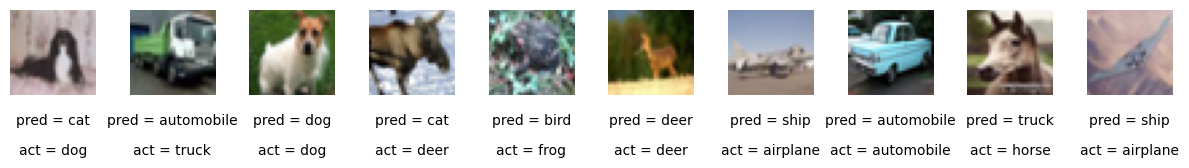

In [ ]:
## Prediction and visualization
CLASSES = np.array(
    ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
)##This array contains the names of the 10 classes in the CIFAR-10 dataset.
preds = model.predict(x_test)##predict: Outputs the softmax probability predictions for the test data.
preds_single = CLASSES[np.argmax(preds, axis=-1)]##np.argmax: Determines the class with the highest predicted probabilities.
actual_single = CLASSES[np.argmax(y_test, axis=-1)]

n_to_show = 10##display 10 images
indices = np.random.choice(range(len(x_test)), n_to_show)##randomly selects 10 indices from the test set for visualization
fig = plt.figure(figsize=(15, 3))##creates a figure of size 15x3 inches to hold the 10 images
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, idx in enumerate(indices):## loop iterates over the 10 randomly selected images
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i + 1)##displays the image in the subplot
    ax.axis("off")##hides the axes for a cleaner visualization
    ##add text annotations below each image, showing the predicted label (preds_single) and the actual label (actual_single)
    ax.text(0.5, -0.35, "pred = " + str(preds_single[idx]), fontsize=10, ha="center", transform=ax.transAxes)##
    ax.text(0.5, -0.7, "act = " + str(actual_single[idx]), fontsize=10, ha="center", transform=ax.transAxes)
    ax.imshow(img)

plt.show()##displays the figure with the 10 images and their corresponding predicted and actual labels.